<a href="https://colab.research.google.com/github/meghavarshini/useful_random_code/blob/main/Generate_Spectrogram_Waveform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Pretty Spectrograms and Waveforms with Python

This notebook offers simple code snippets to generate camera-ready spectrograms based on user specifications.

## Installations

In [1]:
pip install librosa matplotlib numpy

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import pathlib
from pathlib import Path

## Functions defining and implementing the graphics


In [24]:
def extract_transcript(transcript_path):
  with open(transcript_path) as f:
    transcript_text = ""
    for i in f.readlines():
        transcript_text = transcript_text + "\n" + i
    return transcript_text.strip("\n")

def find_cmap_color(cmap_color):
    '''
    Function to find a nice contrast color from the user-specified colormap to use on the waveform.
    It takes a colormap as input and returns hex values for a contrast color.
    '''
    cmap = plt.get_cmap(cmap_color)
    color = cmap(0.6)
    # Getting the lightest color, corresponds to the maximum value
    color_hex = mcolors.rgb2hex(color[:3])
    print(f"Contrast in {cmap_color} colormap: {color_hex}")
    return color_hex


def plot_waveform_and_spectrogram(audio_file, transcript,
                                  cmap_color = 'YlOrBr'):
    '''
    Function to plot the waveform and spectrogram for an audio file,
    with given transcript, and save it to file.
    User inputs include an location of a file, transcript for the audio, and
    a matplotlib colormap
    '''
    # select waveform color
    waveform_color = find_cmap_color(cmap_color)

    # find filename for plot using sound file name
    file_name = Path(audio_file).stem + '_plot.png'
    save_plot_loc = str(pathlib.Path(audio_file).parents[0])+'/'+ file_name

    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)
    # y: audio time series, sr: sample rate

    # Create a time axis for the waveform
    time = np.linspace(0, len(y) / sr, num=len(y))

    # Generate a spectrogram
    hop_length = 512  # Number of samples between frames
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000, hop_length=hop_length)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Calculate the spectrogram's time axis to match the waveform
    spectrogram_time = np.arange(S.shape[1]) * hop_length / sr

    # Set up the grid layout
    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(3, 2, width_ratios=[0.05, 0.95], height_ratios=[1, 1, 0.17], figure=fig)

    # Plot waveform
    ax_waveform = fig.add_subplot(gs[0, 1])
    ax_waveform.plot(time, y, color=waveform_color)  # Lighter yellow color
    ax_waveform.set_facecolor('black')  # Dark background for waveform
    # ax_waveform.set_title('Waveform', color='black')
    # ax_waveform.set_ylabel('Amplitude', color='black')
    ax_waveform.tick_params(colors='black')  # Ticks in white for visibility on dark background
    # Add time (s) label to the top of the waveform
    ax_waveform.set_xlabel('Time (s)', color='black', labelpad=20)  # Label at the top
    ax_waveform.xaxis.set_label_position('top')  # Move label to the top

    # Plot spectrogram
    ax_spectrogram = fig.add_subplot(gs[1, 1], sharex=ax_waveform)
    ax_spectrogram.set_facecolor('white')  # White background for spectrogram
    img = ax_spectrogram.imshow(
        S_dB, aspect='auto', origin='lower',
        extent=[spectrogram_time[0], spectrogram_time[-1], 0, 8000],
        cmap=cmap_color  # Colormap for spectrogram
    )
    ax_spectrogram.set_ylabel('Frequency (Hz)', color='black')  # Dark labels for spectrogram
    # ax_spectrogram.set_xlabel('Time (s)', color='black')  # Dark x-label
    ax_spectrogram.tick_params(colors='black')  # Dark ticks for visibility on white background

    # Add a color bar on the left
    cbar_ax = fig.add_subplot(gs[:, 0])
    fig.colorbar(img, cax=cbar_ax, format='%+2.0f dB', label='dB')
    cbar_ax.tick_params(colors='black')  # Dark color bar ticks
    cbar_ax.yaxis.set_label_position('left')
    cbar_ax.yaxis.tick_left()
    cbar_ax.yaxis.set_ticks_position('left')

    # # Add a main plot title
    # fig.suptitle('Audio Waveform and Mel Spectrogram', fontsize=16, color='black')

    # Add the transcript below the spectrogram
    ax_transcript = fig.add_subplot(gs[2, 1])
    ax_transcript.axis('off')  # Turn off the axis for the transcript
    ax_transcript.text(0, 0.5, transcript, fontsize=10, color='black', ha='left', va='center', wrap=True)

    # Save the plot as PNG
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.15)  # Adjust the layout to make space for the title and transcript
    plt.savefig(save_plot_loc, format='png')

    # Show the plot
    plt.show()

## Two Examples:

In [27]:
# Example Audio file and transcript
!wget -O multicat_snippet1.mp3 https://raw.githubusercontent.com/meghavarshini/useful_random_code/main/multicat_snippet1.mp3
!wget -O multicat_snippet1_transcript.txt https://raw.githubusercontent.com/meghavarshini/useful_random_code/main/multicat_snippet1_transcript.txt

#save audio file path to variable:
audio_file_path = '/content/multicat_snippet1.mp3'
#extract and save transcript to variable:
transcript_text = extract_transcript('/content/multicat_snippet1_transcript.txt')
print(f"transcript: {transcript_text}" )

--2024-12-04 21:02:28--  https://raw.githubusercontent.com/meghavarshini/useful_random_code/main/multicat_snippet1.mp3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254594 (249K) [audio/mpeg]
Saving to: ‘multicat_snippet1.mp3’

multicat_snippet1.m 100%[===================>] 248.63K  --.-KB/s    in 0.03s   

2024-12-04 21:02:28 (8.75 MB/s) - ‘multicat_snippet1.mp3’ saved [254594/254594]

--2024-12-04 21:02:28--  https://raw.githubusercontent.com/meghavarshini/useful_random_code/main/multicat_snippet1_transcript.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, aw

Contrast in YlOrBr colormap: #f07818


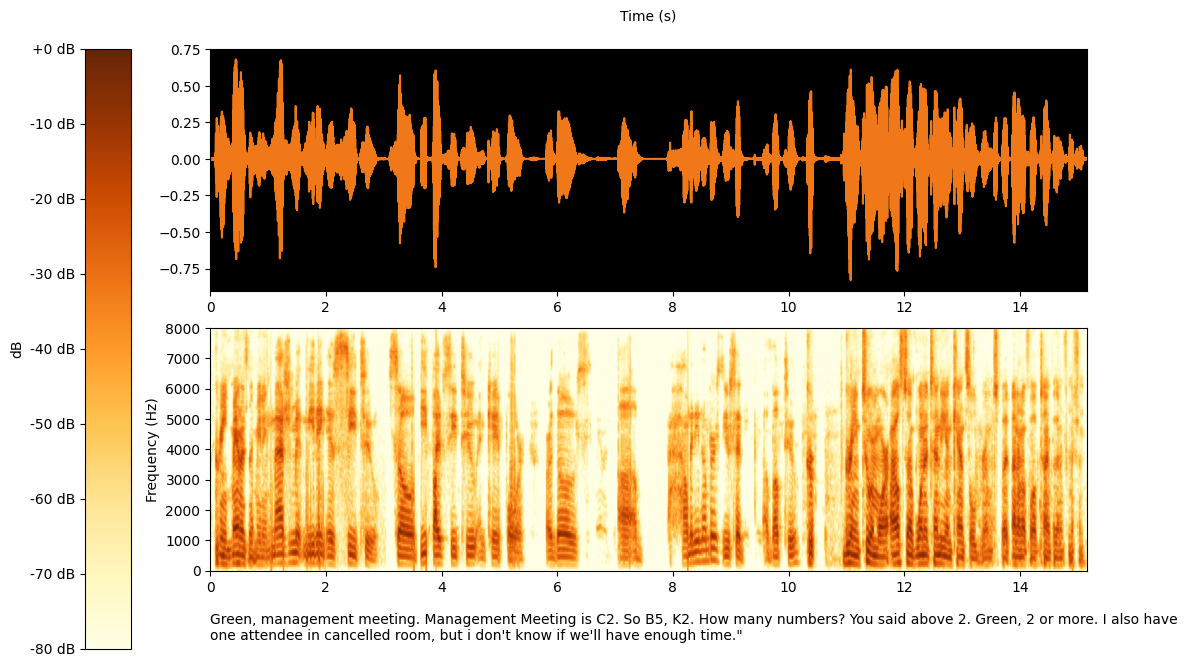

In [28]:
plot_waveform_and_spectrogram(audio_file_path, transcript_text)

In [29]:
# Replace with the path to your .mp3 file
!wget -O multicat_snippet2.mp3 https://raw.githubusercontent.com/meghavarshini/useful_random_code/main/multicat_snippet2.mp3
!wget -O multicat_snippet2_transcript.txt https://raw.githubusercontent.com/meghavarshini/useful_random_code/main/multicat_snippet2_transcript.txt
audio_file_path = '/content/multicat_snippet2.mp3'
transcript_text = extract_transcript('/content/multicat_snippet2_transcript.txt')


--2024-12-04 21:02:54--  https://raw.githubusercontent.com/meghavarshini/useful_random_code/main/multicat_snippet2.mp3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 581471 (568K) [audio/mpeg]
Saving to: ‘multicat_snippet2.mp3’

multicat_snippet2.m 100%[===================>] 567.84K  --.-KB/s    in 0.03s   

2024-12-04 21:02:55 (17.7 MB/s) - ‘multicat_snippet2.mp3’ saved [581471/581471]

--2024-12-04 21:02:55--  https://raw.githubusercontent.com/meghavarshini/useful_random_code/main/multicat_snippet2_transcript.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, aw

Contrast in plasma colormap: #e16462


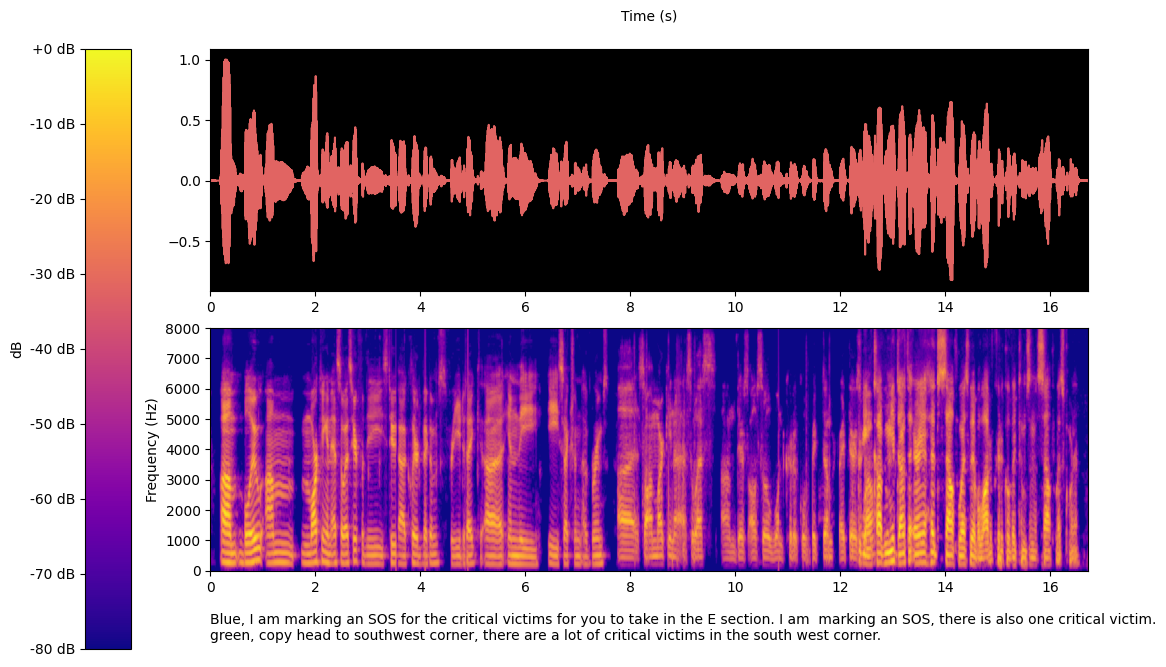

In [30]:
plot_waveform_and_spectrogram(audio_file_path, transcript_text,
                              cmap_color='plasma')

## Sample code
**Warning:** will give errors if run unedited

In [ ]:
# Replace with the path to your .mp3 file
# Yuu can upload a file to Colab using the sidebar,
# and add the filename to the path below:

audio_file_path = '/content/<filename>.mp3'

### OPTION 1 TYPE YOUR TRANSCRIPTION
transcript_text = "type transcription here"

### OPTION 2 ADD transcript plaintext from file:
transcript_text = extract_transcript(<filename>)

In [ ]:
plot_waveform_and_spectrogram(audio_file_path, transcript_text,
                              cmap_color='coolwarm')